## statistical analysis of the MC results

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt



In [7]:
nsamp = 10000
nbins = 100
nev   = 500000
mu    = 0.0

print(str(mu))

name = 'ToyMC_BatchMu_IsoTrk__nsamples_'+str(nsamp)+'__nbins_'+str(nbins)+'__nev_'+str(nev)+'__mu_'+str(mu)+'.txt'

print(name)

data = np.loadtxt("IsoTrk/"+name)
print(data)

0.0
ToyMC_BatchMu_IsoTrk__nsamples_10000__nbins_100__nev_500000__mu_0.0.txt
[ 77.4351 124.873   89.6181 ... 106.339   81.4009 108.725 ]


In [18]:
nsamp = 10000
nbins = 100
nev   = 500000
mus = [5.0*x for x in range(0,101)]

data_AllMu = []

for mu in mus:
    fname = 'ToyMC_BatchMu_IsoTrk__nsamples_'+str(nsamp)+'__nbins_'+str(nbins)+'__nev_'+str(nev)+'__mu_'+str(mu)+'.txt'
    data_AllMu.append(np.loadtxt("IsoTrk/"+fname))

data_AllMu = np.array(data_AllMu)
print(data_AllMu)

[[  77.4351  124.873    89.6181 ...  106.339    81.4009  108.725 ]
 [  77.9887  113.322    89.2039 ...  113.274    74.5396   98.4271]
 [  80.4492  100.375    83.6486 ...   68.6489  100.619    82.2981]
 ...
 [3622.43   3600.63   3533.05   ... 3506.72   3515.85   3531.67  ]
 [3694.13   3785.25   3681.17   ... 3660.78   3544.82   3472.59  ]
 [3755.43   3796.88   3838.81   ... 3516.74   3729.67   3558.48  ]]


(array([  13.,  218., 1067., 2499., 2943., 2128.,  867.,  205.,   55.,
           5.]),
 array([111.239 , 130.1104, 148.9818, 167.8532, 186.7246, 205.596 ,
        224.4674, 243.3388, 262.2102, 281.0816, 299.953 ]),
 <a list of 10 Patch objects>)

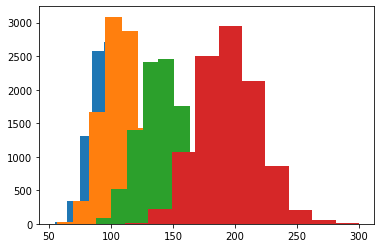

In [21]:
plt.hist(data_AllMu[0])
plt.hist(data_AllMu[5])
plt.hist(data_AllMu[10])
plt.hist(data_AllMu[15])


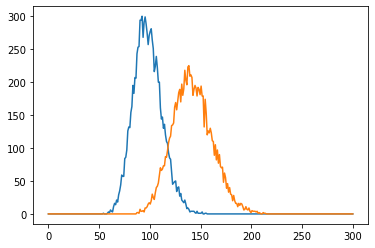

In [77]:
h0, e0 = np.histogram(data_AllMu[0], bins=300, range=(0,300))
h1, e1 = np.histogram(data_AllMu[10], bins=300, range=(0,300))

plt.plot(np.linspace(0,300, 300), h0)
plt.plot(np.linspace(0,300, 300), h1)

## questo test non va un granchè nel nostro caso

In [40]:
from scipy import stats

stats.ks_2samp(h0,h1)

Ks_2sampResult(statistic=0.10666666666666667, pvalue=0.06580849821915531)

Ks_2sampResult(statistic=0.024, pvalue=0.006300553044676882)

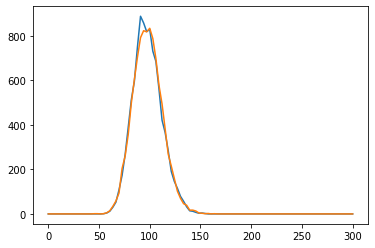

In [68]:
nb = 100
mu_index = 10

h0, e0 = np.histogram(data_AllMu[0], bins=nb, range=(0,300))
h1, e1 = np.histogram(data_AllMu[1], bins=nb, range=(0,300))

plt.plot(np.linspace(0,300, nb), h0)
plt.plot(np.linspace(0,300, nb), h1)

stats.ks_2samp(data_AllMu[0],data_AllMu[1])

## provo con la kullback-leibler

non penso vada bene perchè nella zona q=0 abbiamo divegenze, il che ha senso perchè la distanza delle distribuzioni è minore della dKb ma non ci aiuta

In [86]:
def KB_dist(P, Q):
    if(len(P)!=len(Q)): return -1
    return np.sum(P*np.log(P/Q) )

def Total_var_dist (D_kb):
    return math.sqrt(0.5*D_kb)

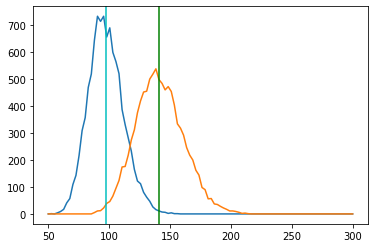

In [112]:
nb = 100
mId = 10

h0, e0 = np.histogram(data_AllMu[0]  , bins=nb, range=(50,300))
h1, e1 = np.histogram(data_AllMu[mId], bins=nb, range=(50,300))

plt.plot(np.linspace(50,300, nb), h0)
plt.plot(np.linspace(50,300, nb), h1)
plt.axvline(np.median(data_AllMu[0]) , c='c')
plt.axvline(np.median(data_AllMu[mId]), c='g' )



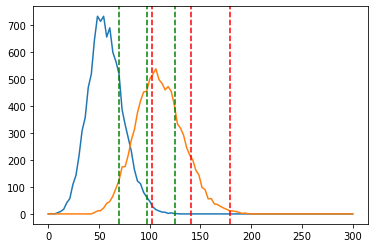

In [110]:
med0 = np.median(data_AllMu[0])
med1 = np.median(data_AllMu[mId])

sig0 = math.sqrt(np.var(data_AllMu[0]))
sig1 = math.sqrt(np.var(data_AllMu[mId]))


plt.plot(np.linspace(0,300, nb), h0)
plt.plot(np.linspace(0,300, nb), h1)
plt.axvline(med0, c='g', ls='--')
plt.axvline(med1, c='r', ls='--')
plt.axvline(med0+2*sig0, c='g', ls='--')
plt.axvline(med0-2*sig0, c='g', ls='--')
plt.axvline(med1+2*sig1, c='r', ls='--')
plt.axvline(med1-2*sig1, c='r', ls='--')


In [209]:
def plot_hists(nb, idx, upper=300):
    h0, e0 = np.histogram(data_AllMu[0]  , bins=nb, range=(50,upper))
    h1, e1 = np.histogram(data_AllMu[idx], bins=nb, range=(50,upper))
    med0 = np.median(data_AllMu[0])
    med1 = np.median(data_AllMu[idx])
    sig0 = math.sqrt(np.var(data_AllMu[0]))
    sig1 = math.sqrt(np.var(data_AllMu[idx]))
    
    plt.plot(np.linspace(50,upper, nb), h0)
    plt.plot(np.linspace(50,upper, nb), h1)
    plt.axvline(med0, c='g', ls='--')
    plt.axvline(med1, c='r', ls='--')
    plt.axvline(med0+2*sig0, c='g', ls='--')
    plt.axvline(med0-2*sig0, c='g', ls='--')
    plt.axvline(med1+2*sig1, c='r', ls='--')
    plt.axvline(med1-2*sig1, c='r', ls='--')
    
def sub_plot_hists(ax, nb, idx, upper=300):
    h0, e0 = np.histogram(data_AllMu[0]  , bins=nb, range=(50,upper))
    h1, e1 = np.histogram(data_AllMu[idx], bins=nb, range=(50,upper))
    med0 = np.median(data_AllMu[0])
    med1 = np.median(data_AllMu[idx])
    sig0 = math.sqrt(np.var(data_AllMu[0]))
    sig1 = math.sqrt(np.var(data_AllMu[idx]))
    
    dist = med1-med0
    sig = math.sqrt(sig0**2+sig1**2)
    
    ax.plot(np.linspace(50,upper, nb), h0)
    ax.plot(np.linspace(50,upper, nb), h1)
    ax.axvline(med0, c='g', ls='--')
    ax.axvline(med1, c='r', ls='--')
    ax.axvline(med0+2*sig0, c='g', ls='--')
    ax.axvline(med0-2*sig0, c='g', ls='--')
    ax.axvline(med1+2*sig1, c='r', ls='--')
    ax.axvline(med1-2*sig1, c='r', ls='--')
    ax.set_title("Distribution for $\mu=$"+str(mus[idx]))
    ax.set_xlabel("q($\mu$)")
    ax.text(0.85,0.6, "    Med    $\sigma$\n $H_{0}$   "+str(round(med0,1))+"  "+str(round(sig0,1))+"\n$H_{1}$   "+
                        str(round(med1,1))+"  "+str(round(sig1,1))+ "\n Dist: "+str(round(dist,2))+"\n $\sigma_{TOT}$= "+str(round(sig,2))+
                        "\nCL= "+str(round(dist/sig,2))+"$\sigma$", size=12, ha="center", 
                 transform=ax.transAxes)

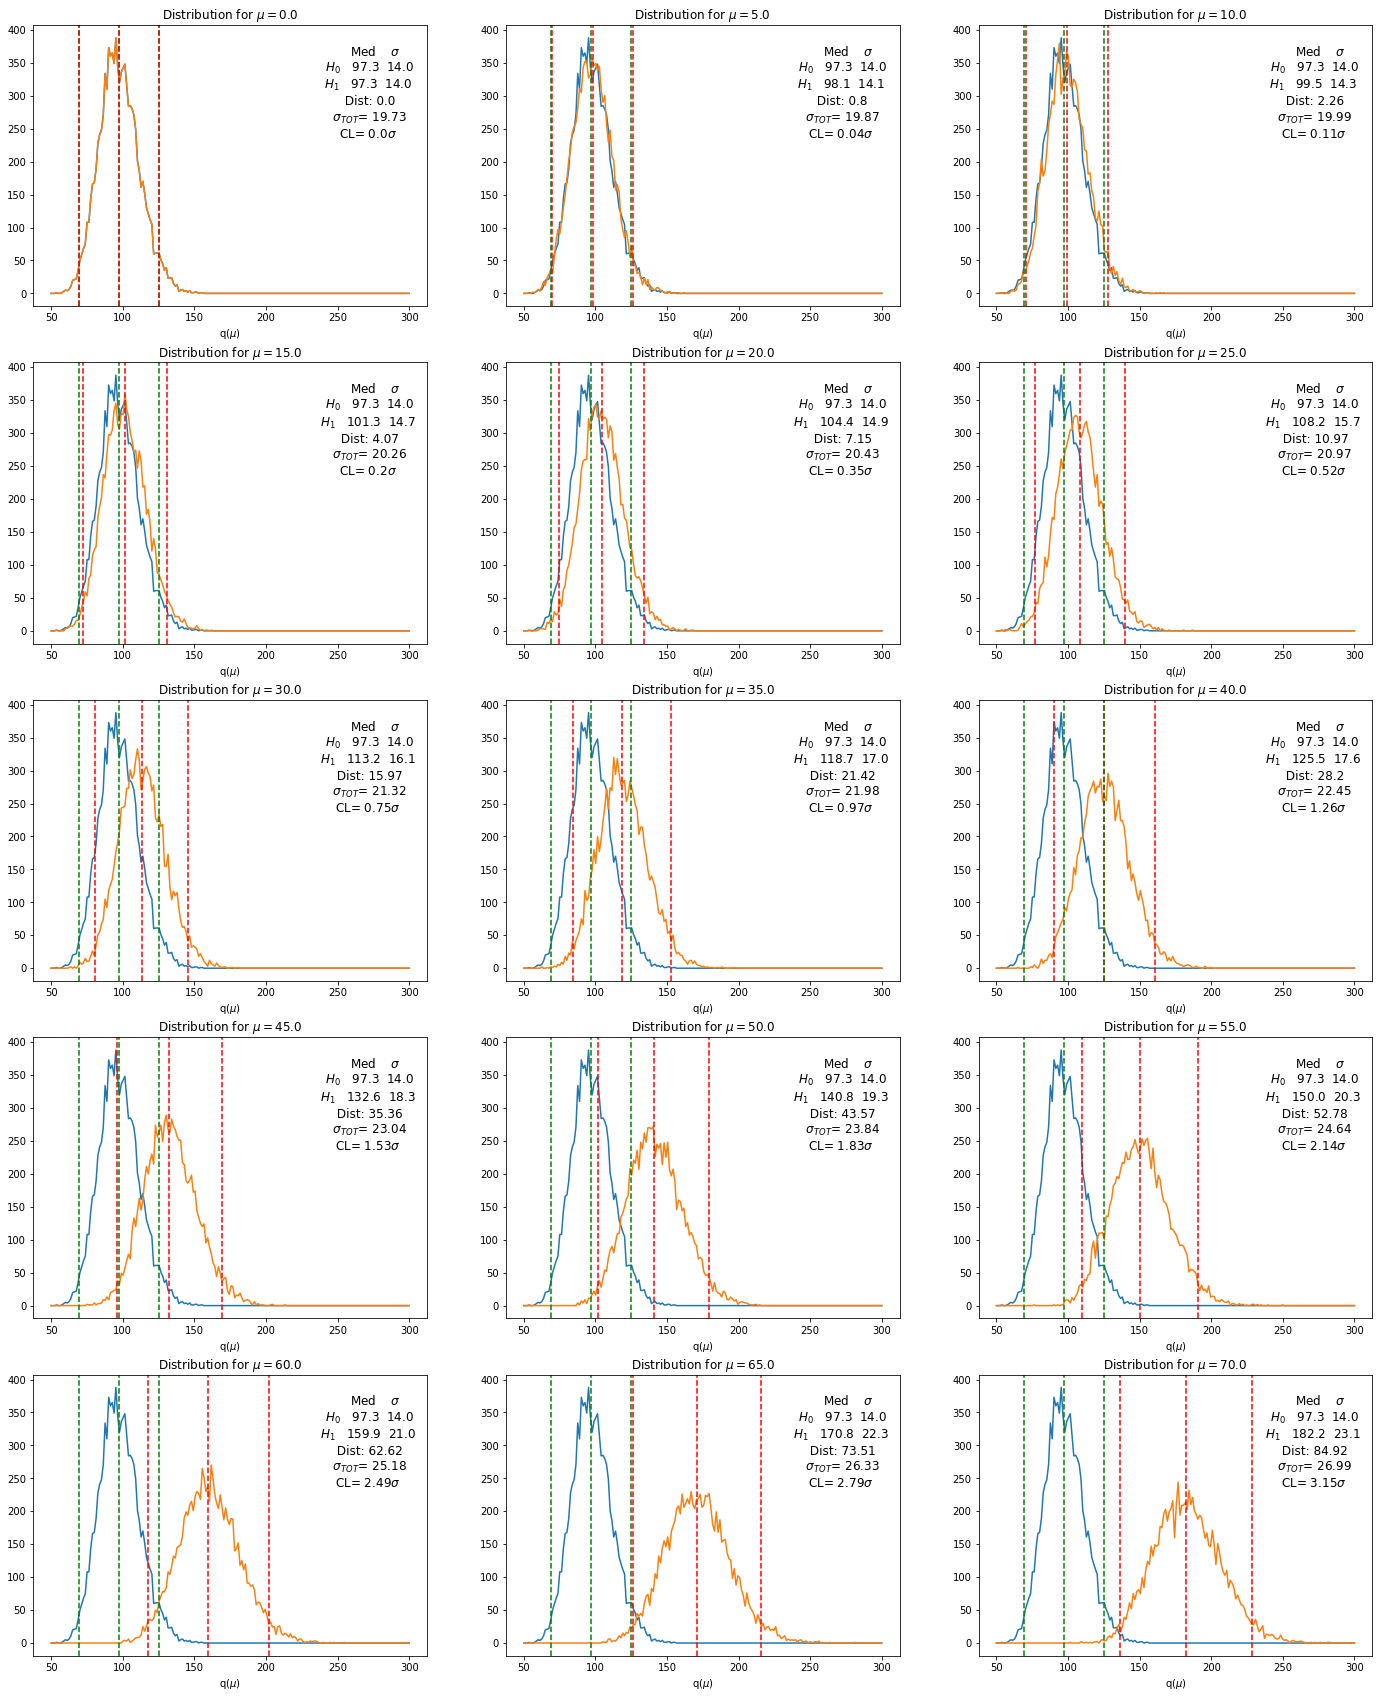

In [210]:
nr = 5
nc = 3
fig, axs = plt.subplots(nr, nc, figsize=(8*nc, 6*nr))
for i in range(0,nr):
    for j in range(0,nc):
        sub_plot_hists(axs[i,j], 200, j+nc*i)
